In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\nbwan\Python\Data Science\diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


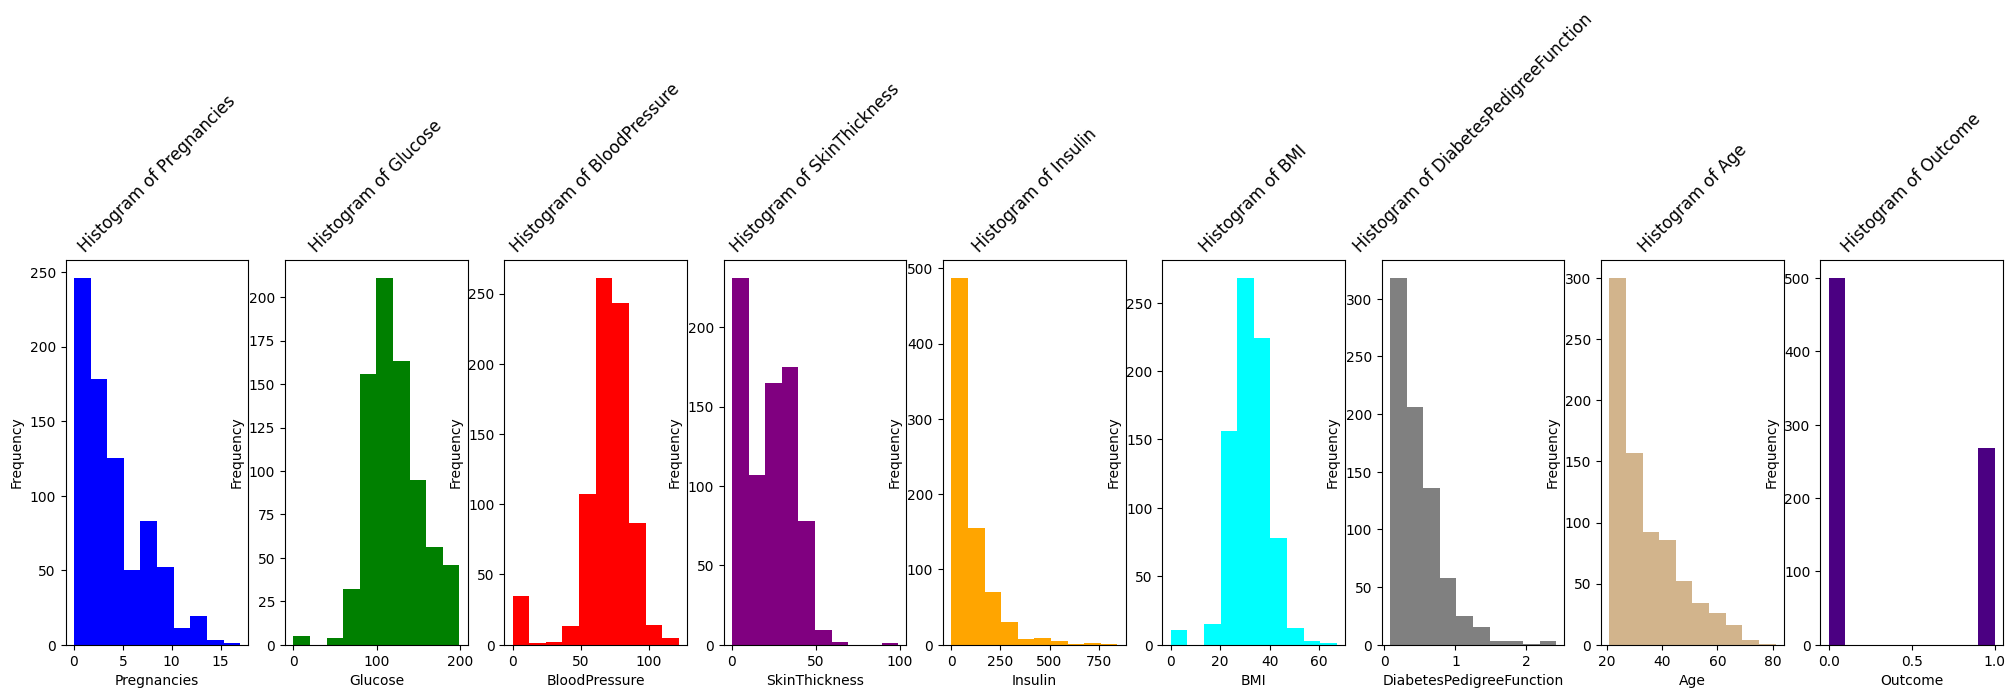

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 5))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'aqua', 'gray', 'tan', 'indigo']

for i, col in enumerate(df.columns):
    axes[i].hist(df[col])
    axes[i].hist(df[col], color=colors[i % len(colors)])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_title(f"Histogram of {col}", rotation=45)
    axes[i].set_ylabel("Frequency")


plt.show()

In [36]:
feature_cols = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

X = df[feature_cols]
y= df.Outcome

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42) 

In [38]:
X_train.shape

(614, 8)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\nbwan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
model.score(X_test, y_test)

0.7467532467532467

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n'

In [47]:
import numpy as np
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': coefficients
})

feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                    Feature  Coefficient  Absolute Coefficient
6  DiabetesPedigreeFunction     0.613352              0.613352
5                       BMI     0.099098              0.099098
0               Pregnancies     0.057998              0.057998
7                       Age     0.037253              0.037253
1                   Glucose     0.034076              0.034076
2             BloodPressure    -0.014119              0.014119
3             SkinThickness     0.004254              0.004254
4                   Insulin    -0.001873              0.001873


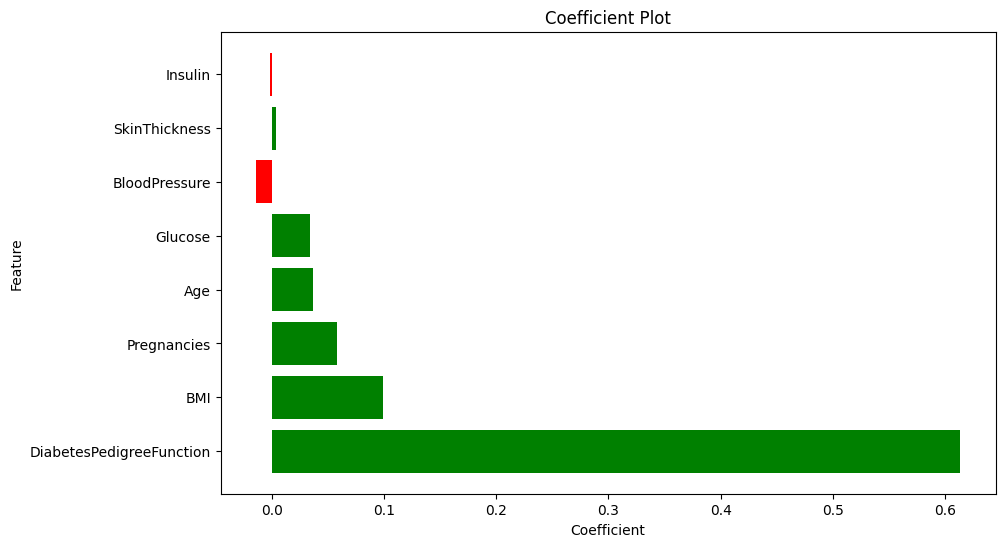

In [48]:
plt.figure(figsize=(10, 6))
colors = ['green' if coef > 0 else 'red' for coef in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficient Plot')
plt.show()